<a href="https://colab.research.google.com/github/Jubin5/Machine-Learning/blob/main/Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

**1.LOADING AND PREPROCESSING**

In [3]:
data=pd.read_csv("/content/CarPrice_Assignment.csv")
df=pd.DataFrame(data)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**2.FEATURE ANALYSIS**


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

So from my domain knowledge out these 20 columns we need not take all columns as input independent variables,I am choosing main features which directly influence the price of the car.(fueltype,enginetype,cylindernumber,fuelsystem,horsepower,citympg,highwaympg) these are the features Im choosing.

In [ ]:
df.duplicated().sum()
df.isnull().sum()
df.select_dtypes(include="number").skew()


,0
car_ID,0.000000
symboling,0.211072
wheelbase,1.050214
carlength,0.155954
carwidth,0.904003
carheight,0.063123
curbweight,0.681398
enginesize,1.947655
boreratio,0.020156
stroke,-0.689705


The Result shows that there is no duplicated and null cells but there is some skewness which indicates the presence of outliers.So we need to handle the outliers.Here Im using IQR method by creating a user defined function for it.

In [ ]:
def remove_outliers(df,coloumns):
  df_filtered=df.copy()
  for i in coloumns:
    q1=df[i].quantile(.25)
    q2=df[i].quantile(.75)
    lowerwhisker=q1-1.5*(q2-q1)
    upperwhisker=q2+1.5*(q2-q1)
    df_filtered=df_filtered[(df_filtered[i]>=lowerwhisker)&(df_filtered[i]<=upperwhisker)]
  return df_filtered

In [ ]:
df2=remove_outliers(df,["citympg","highwaympg","horsepower","compressionratio"])

In [ ]:
df2.select_dtypes(include="number").skew()


,0
car_ID,0.003180
symboling,0.149297
wheelbase,1.324698
carlength,0.296310
carwidth,1.154778
carheight,0.125224
curbweight,0.914416
enginesize,2.219474
boreratio,0.100789
stroke,-0.804937


SO now the percent of outliers has decreased by applying IQR function


In [ ]:
scaler = StandardScaler()
numerical_features = df2.select_dtypes(include="number").columns
df2_numerical = df2[numerical_features]
scaled_features = scaler.fit_transform(df2_numerical)

scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)
# scaled_df = pd.concat([scaled_df, df2.select_dtypes(exclude="number")], axis=1

print("\nSample of Scaled DataFrame:")
print(scaled_df.head())


Sample of Scaled DataFrame:
     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.665039   1.844344  -1.789131  -0.382056 -0.792501  -2.107722    0.118078   
1 -1.648561   1.844344  -1.789131  -0.382056 -0.792501  -2.107722    0.118078   
2 -1.632083   0.163173  -0.716572  -0.182850 -0.088187  -0.563086    0.686873   
3 -1.615605   1.003758   0.246913   0.265364  0.263970   0.252139   -0.318343   
4 -1.599127   1.003758   0.174197   0.265364  0.364586   0.252139    0.688942   

   enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.194679   0.618739 -1.763652          0.179199    0.311783 -0.435768   
1    0.194679   0.618739 -1.763652          0.179199    0.311783 -0.435768   
2    0.759975  -2.410669  0.815943          0.179199    1.637630 -0.435768   
3   -0.344921  -0.454975  0.587372          1.994684    0.034280  0.710991   
4    0.348851  -0.454975  0.587372         -1.636286    0.435117  0.710991   

    citympg  hi

**3.MODEL IMPLEMENTATION**

In [ ]:

X=scaled_df.drop(["price"],axis=1)
Y=scaled_df["price"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)
print("MSE:",MSE)
print("MAE:",MAE)
print("R2:",R2)

MSE: 0.2820608154058
MAE: 0.32981601805888183
R2: 0.8378939246272276


In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dt.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)

print("MSE:",MSE)
print("MAE:",MAE)
print("R2:",R2)

MSE: 0.1465847737300571
MAE: 0.2635777335483986
R2: 0.915754755425355


In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)
print("MSE:",MSE)
print("MAE:",MAE)
print("R2:",R2)

MSE: 0.22586229711638853
MAE: 0.2713204019993767
R2: 0.8701923537037896


In [4]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
y_pred=gbr.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)
print("MSE:",MSE)
print("MAE:",MAE)
print("R2:",R2)


NameError: name 'gbr' is not defined

In [ ]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [ ]:
y_pred=svr.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)
print("MSE:",MSE)
print("MAE:",MAE)
print("R2:",R2)


MSE: 0.33389362488581076
MAE: 0.3287004337373106
R2: 0.8081045570106706


**4.MODEL EVALUATION**

On explaining about the models out of the five models the most efficient model is GradientBoost Algorithm because it has the lowest MSE(0.15) and also highest R2score of (0.908)which is nearly to 1,others are performing lower than this.
 Using this three metrics I had created a bar chart and it is given below


 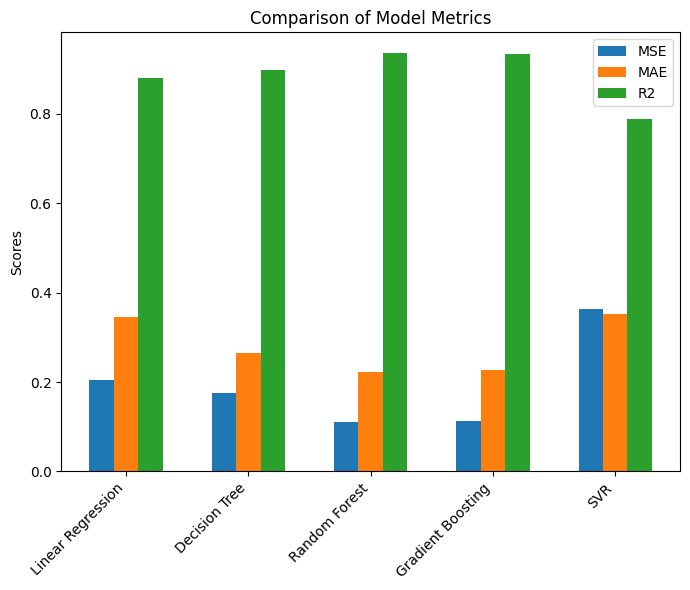
